In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn. metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import joblib
from pathlib import Path
import pickle
from datetime import date
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
#This python script is performed assuming the streamflow data provided has already been converted to AF, 
#This aligns better with projection volumes from the BCA report


#set path to load historical data
P0_Path = Path('../Outputs/PrelimGS/0P_Conservation')
P25_Path = Path('../Outputs/PrelimGS/25P_Conservation')
P50_Path = Path('../Outputs/PrelimGS/50P_Conservation')
P75_Path = Path('../Outputs/PrelimGS/75P_Conservation')


#load  streamflows from BCC, LCC, CC, PC
P0 = {i.stem[7:15] : pd.read_excel(i) for i in P0_Path.glob('**/*.xlsx')}
P25 = {i.stem[7:15] : pd.read_excel(i) for i in P25_Path.glob('**/*.xlsx')}
P50 = {i.stem[7:15] : pd.read_excel(i) for i in P50_Path.glob('**/*.xlsx')}
P75 = {i.stem[7:15] : pd.read_excel(i) for i in P75_Path.glob('**/*.xlsx')}

#put into big dict
Cons_Scens= {'P0':P0,
             'P25':P25,
             'P50':P50,
             'P75':P75}
P0keys=P0.keys()
Droughts = Cons_Scens['P0'].keys()

#tier out the drought years of interest
for i in Cons_Scens:
    Cons_Scens[i]['2032_Ann']=Cons_Scens[i]['2032_Ann'][Cons_Scens[i]['2032_Ann']['Year']>2034]
    Cons_Scens[i]['2032_Ann']=Cons_Scens[i]['2032_Ann'][Cons_Scens[i]['2032_Ann']['Year']<2040]
    Cons_Scens[i]['2056_Ann']=Cons_Scens[i]['2056_Ann'][Cons_Scens[i]['2056_Ann']['Year']>2058]
    Cons_Scens[i]['2056_Ann']=Cons_Scens[i]['2056_Ann'][Cons_Scens[i]['2056_Ann']['Year']<2064]
    Cons_Scens[i]['2084_Ann']=Cons_Scens[i]['2084_Ann'][Cons_Scens[i]['2084_Ann']['Year']>2086]
    Cons_Scens[i]['2084_Ann']=Cons_Scens[i]['2084_Ann'][Cons_Scens[i]['2084_Ann']['Year']<2092]
    
    Cons_Scens[i]['2032_Day']=Cons_Scens[i]['2032_Day'][Cons_Scens[i]['2032_Day']['Day']>'2034-9-30']
    Cons_Scens[i]['2032_Day']=Cons_Scens[i]['2032_Day'][Cons_Scens[i]['2032_Day']['Day']<'2040-9-30']
    Cons_Scens[i]['2056_Day']=Cons_Scens[i]['2056_Day'][Cons_Scens[i]['2056_Day']['Day']>'2058-9-30']
    Cons_Scens[i]['2056_Day']=Cons_Scens[i]['2056_Day'][Cons_Scens[i]['2056_Day']['Day']<'2064-10-1']
    Cons_Scens[i]['2084_Day']=Cons_Scens[i]['2084_Day'][Cons_Scens[i]['2084_Day']['Day']>'2086-9-30']
    Cons_Scens[i]['2084_Day']=Cons_Scens[i]['2084_Day'][Cons_Scens[i]['2084_Day']['Day']<'2092-10-1']
    
    #SEt the index to the Timestamp
    for j in Droughts:
        Cons_Scens[i][j].index=Cons_Scens[i][j].iloc[:,0]
        Cons_Scens[i][j]=Cons_Scens[i][j].drop(Cons_Scens[i][j].columns[0], axis=1)

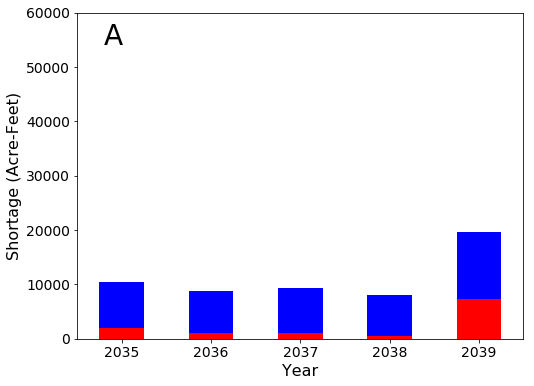

In [29]:
#plot for 2032
Colors={'P0':'blue',
             'P25':'red',
             'P50':'orange',
             'P75':'green'}

Labels = {'P0':'No OD Conservation',
             'P25':'25% OD Conservation',
             'P50':'50% OD Conservation',
             'P75':'75% OD Conservation'}
fig,ax=plt.subplots()
fig.set_size_inches(8,6)

for i in Cons_Scens:
    Cons_Scens[i]['2032_Ann']['SLCDPU Shortages'].plot(kind='bar', color=Colors[i], label=Labels[i])
    
#plt.title('5 year Historical Drought,2030s', size=18)
plt.xlabel('Year', size=16)
plt.ylabel('Shortage (Acre-Feet)', size = 16)
plt.annotate('A', xy=(-.2, 54000),  size=28)
plt.ylim(0,60000)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
#plt.legend(prop={'size': 14})

fig.savefig('../Figures/PrelimGS/2032_Cons_D3_7yr.png')

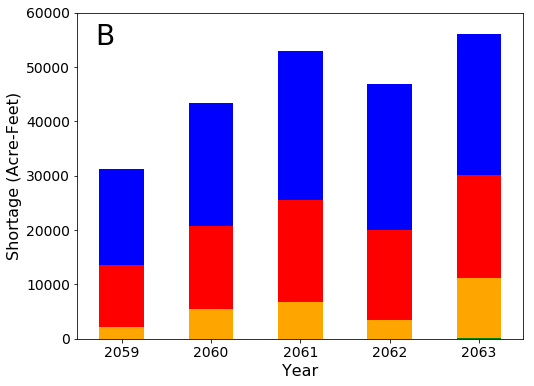

In [4]:
#plot for 2056
Colors={'P0':'blue',
             'P25':'red',
             'P50':'orange',
             'P75':'green'}

Labels = {'P0':'No OD Conservation',
             'P25':'25% OD Conservation',
             'P50':'50% OD Conservation',
             'P75':'75% OD Conservation'}
fig,ax=plt.subplots()
fig.set_size_inches(8,6)

for i in Cons_Scens:
    Cons_Scens[i]['2056_Ann']['SLCDPU Shortages'].plot(kind='bar', color=Colors[i], label=Labels[i])
    
#plt.title('5 year Historical Drought,2050s', size=18)
plt.xlabel('Year', size=16)
plt.ylabel('Shortage (Acre-Feet)', size = 16)
plt.annotate('B', xy=(-.3, 54000),  size=28)
plt.ylim(0,60000)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
#plt.legend(prop={'size': 14})

fig.savefig('../Figures/PrelimGS/2056_Cons_D3_7yr.png')

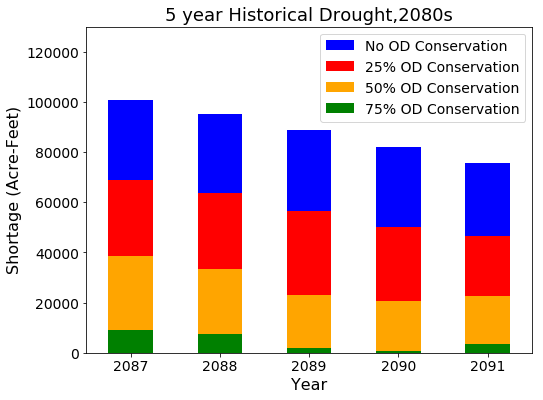

In [69]:
#plot for 2084
Colors={'P0':'blue',
             'P25':'red',
             'P50':'orange',
             'P75':'green'}

Labels = {'P0':'No OD Conservation',
             'P25':'25% OD Conservation',
             'P50':'50% OD Conservation',
             'P75':'75% OD Conservation'}
fig,ax=plt.subplots()
fig.set_size_inches(8,6)

for i in Cons_Scens:
    Cons_Scens[i]['2084_Ann']['SLCDPU Shortages'].plot(kind='bar', color=Colors[i], label=Labels[i])
    
plt.title('5 year Historical Drought,2080s', size=18)
plt.xlabel('Year', size=16)
plt.ylabel('Shortage (Acre-Feet)', size = 16)
plt.ylim(0,130000)
#plt.annotate('A', xy=(10000, 0.000028),  size=28)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})

fig.savefig('../Figures/PrelimGS/2084_Cons_D3_7yr.png')

In [31]:
#need some background info for slides, demands, conserve scenarios, supplies
TD=pd.DataFrame()
ID=pd.DataFrame()
OD=pd.DataFrame()
Sup=pd.DataFrame()

yrs=['2032','2056','2084']
for i in yrs:
    for j in Cons_Scens:
        Cons_Scens[j][i+str('_Ann')]=Cons_Scens[j][i+str('_Ann')].reset_index()
        TD[i+'_'+j]=Cons_Scens[j][i+str('_Ann')]['Produced water Demands for SLCDPU']
        
        ID[i+'_'+j]=Cons_Scens[j][i+str('_Ann')]['SLCDPU_Indoor_Demand']
        
        Cons_Scens[j][i+str('_Ann')]['OD']=Cons_Scens[j][i+str('_Ann')]['Produced water Demands for SLCDPU']-Cons_Scens[j][i+str('_Ann')]['SLCDPU_Indoor_Demand']
        OD[i+'_'+j]=Cons_Scens[j][i+str('_Ann')]['OD']

Sup['Ann_Dis']=Cons_Scens['P0']['2032_Ann']['SupplyStreamflows_Day']



ConsKeys=Cons_Scens.keys()
TDmean=pd.DataFrame(TD.mean(axis=0))


TD_P0=TDmean.iloc[[0,4,8],]
TD_P25=TDmean.iloc[[1,5,9],]
TD_P50=TDmean.iloc[[2,6,10],]
TD_P75=TDmean.iloc[[3,7,11],]

TDs={'TD_P0':TD_P0,
     'TD_P25':TD_P25,
     'TD_P50':TD_P50,
     'TD_P75':TD_P75}
TD_keys = TDs.keys()

for i in TD_keys:
    TDs[i]=TDs[i].reset_index()
    TDs[i].rename(columns={TDs[i].columns[1]:i}, inplace= True)
    TDs[i]['index']= ['2030', '2050', '2080']
    TDs[i].rename(columns={TDs[i].columns[0]:'Decade'}, inplace= True)
    TDs[i].index=TDs[i]['Decade']
    del TDs[i]['Decade']
    
PeriodTD= pd.DataFrame(TDs['TD_P0'])
PeriodTD['TD_P25']=TDs['TD_P25']
PeriodTD['TD_P50']=TDs['TD_P50']
PeriodTD['TD_P75']=TDs['TD_P75']

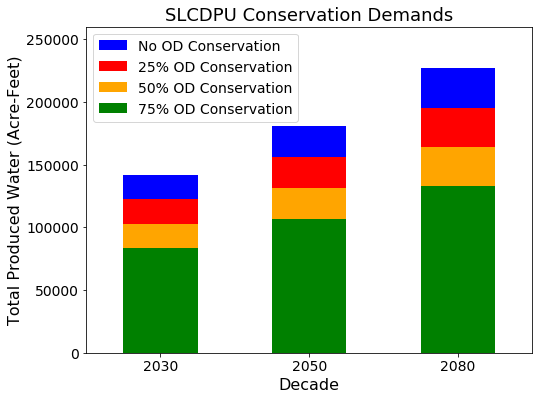

In [32]:
#plot for Total Demands
Colors={'TD_P0':'blue',
             'TD_P25':'red',
             'TD_P50':'orange',
             'TD_P75':'green'}

Labels = {'TD_P0':'No OD Conservation',
             'TD_P25':'25% OD Conservation',
             'TD_P50':'50% OD Conservation',
             'TD_P75':'75% OD Conservation'}
fig,ax=plt.subplots()
fig.set_size_inches(8,6)

for i in PeriodTD:
    PeriodTD[i].plot(kind='bar', color=Colors[i], label=Labels[i])
     
plt.title('SLCDPU Conservation Demands', size=18)
plt.xlabel('Decade', size=16)
plt.ylabel('Total Produced Water (Acre-Feet)', size = 16)
plt.ylim(0,260000)
#plt.annotate('A', xy=(10000, 0.000028),  size=28)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})

fig.savefig('../Figures/PrelimGS/Demands.png')

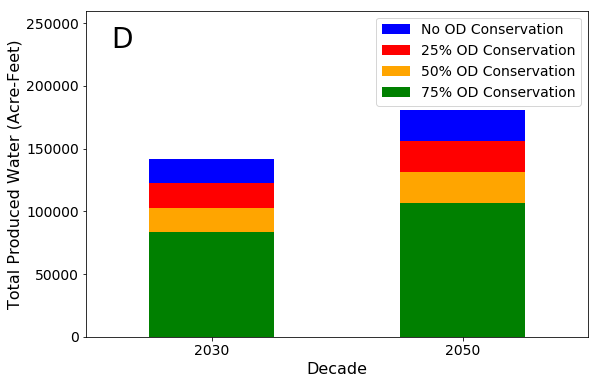

In [52]:
#plot for Total Demands (2030 & 2050)
PeriodTDwo2080 = PeriodTD.iloc[0:2,].copy()
Colors={'TD_P0':'blue',
             'TD_P25':'red',
             'TD_P50':'orange',
             'TD_P75':'green'}

Labels = {'TD_P0':'No OD Conservation',
             'TD_P25':'25% OD Conservation',
             'TD_P50':'50% OD Conservation',
             'TD_P75':'75% OD Conservation'}


fig,ax=plt.subplots()
fig.set_size_inches(9,6)

for i in PeriodTD:
    PeriodTDwo2080[i].plot(kind='bar', color=Colors[i], label=Labels[i])
     
#plt.title('SLCDPU Conservation Demands', size=18)
plt.xlabel('Decade', size=16)
plt.ylabel('Total Produced Water (Acre-Feet)', size = 16)
plt.ylim(0,260000)
plt.annotate('D', xy=(-.4, 230000),  size=28)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})

fig.savefig('../Figures/PrelimGS/Demands2030_2050.png')

In [36]:
ConsKeys=Cons_Scens.keys()
ODmean=pd.DataFrame(OD.mean(axis=0))


OD_P0=ODmean.iloc[[0,4,8],]
OD_P25=ODmean.iloc[[1,5,9],]
OD_P50=ODmean.iloc[[2,6,10],]
OD_P75=ODmean.iloc[[3,7,11],]

ODs={'OD_P0':OD_P0,
     'OD_P25':OD_P25,
     'OD_P50':OD_P50,
     'OD_P75':OD_P75}
OD_keys = ODs.keys()

for i in OD_keys:
    ODs[i]=ODs[i].reset_index()
    ODs[i].rename(columns={ODs[i].columns[1]:i}, inplace= True)
    ODs[i]['index']= ['2030', '2050', '2080']
    ODs[i].rename(columns={ODs[i].columns[0]:'Decade'}, inplace= True)
    ODs[i].index=ODs[i]['Decade']
    del ODs[i]['Decade']
    
PeriodOD= pd.DataFrame(ODs['OD_P0'])
PeriodOD['OD_P25']=ODs['OD_P25']
PeriodOD['OD_P50']=ODs['OD_P50']
PeriodOD['OD_P75']=ODs['OD_P75']

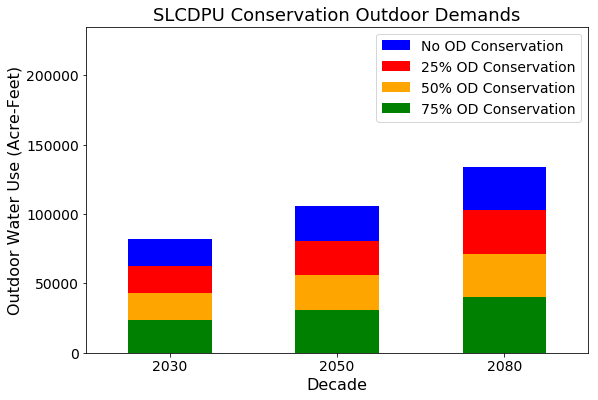

In [75]:
#plot for Total Demands
Colors={'OD_P0':'blue',
             'OD_P25':'red',
             'OD_P50':'orange',
             'OD_P75':'green'}

Labels = {'OD_P0':'No OD Conservation',
             'OD_P25':'25% OD Conservation',
             'OD_P50':'50% OD Conservation',
             'OD_P75':'75% OD Conservation'}
fig,ax=plt.subplots()
fig.set_size_inches(9,6)

for i in PeriodOD:
    PeriodOD[i].plot(kind='bar', color=Colors[i], label=Labels[i])
     
plt.title('SLCDPU Conservation Outdoor Demands', size=18)
plt.xlabel('Decade', size=16)
plt.ylabel('Outdoor Water Use (Acre-Feet)', size = 16)
plt.ylim(0,235000)
#plt.annotate('A', xy=(10000, 0.000028),  size=28)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})

fig.savefig('../Figures/PrelimGS/OutoorDemands.png')

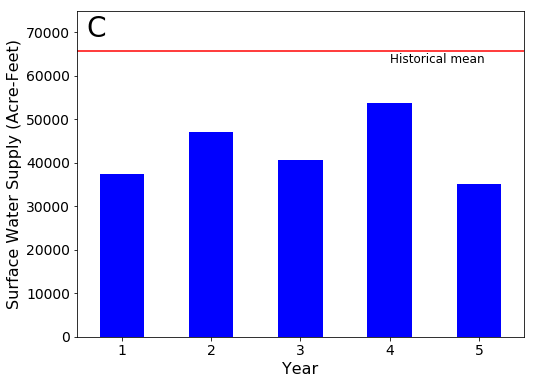

In [50]:
#plot for supply
fig,ax=plt.subplots()
fig.set_size_inches(8,6)

Cons_Scens['P0']['2032_Ann'].index=[1,2,3,4,5]

Cons_Scens['P0']['2032_Ann']['SupplyStreamflows_Day'].plot(kind='bar', color='blue')
ax.axhline(y=65760, color='red')
#plt.title('1988-1992 Drought', size=18)
plt.xlabel('Year', size=16)
plt.ylabel('Surface Water Supply (Acre-Feet)', size = 16)
plt.ylim(0,75000)
plt.annotate('Historical mean', xy=(3, 63000),  size=12)
plt.annotate('C', xy=(-.4, 69000),  size=28)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
#plt.legend(prop={'size': 14})

fig.savefig('../Figures/PrelimGS/Supply.png')

In [56]:
np.mean(65760-Cons_Scens['P0']['2032_Ann']['SupplyStreamflows_Day'])

22887.8

In [6]:
import cv2 as cv
image1 = cv.imread('../Figures/PrelimGS/2032_Cons_D3_7yr.png')
#image2 = cv.imread('anotherimage')
#plt.subplot(1, 2, 1), plt.imshow(image1, 'gray')
#plt.subplot(1, 2, 2), plt.imshow(image2, 'gray')
#plt.savefig('final_image_name.extension') # To save figure
#plt.show() # To show figure

ModuleNotFoundError: No module named 'cv2'

In [8]:
import cv2 

ModuleNotFoundError: No module named 'cv2'